In [2]:
import numpy as np
from skimage import io
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import cv2

In [61]:
def rbg_to_gray(img):
    copy = np.dot(img[:,:,:], [0.2989, 0.5870, 0.1140])
    return copy

def plot_lbp(img_vec):
    f, axarr = plt.subplots(1, len(img_vec), figsize = (12,12))
    for i in range(len(img_vec)):
        axarr[i].imshow(img_vec[i], cmap='gray')
        axarr[i].set_title('Textura ' + str(i + 1))
    plt.show()

def plot_histogram(img_vec, show_original=False):
    if show_original:
        return
    else:
        f, axarr = plt.subplots(1, len(img_vec), figsize = (12,2))
        for i in range(len(img_vec)):
            width, height = img_vec[i].shape
            hist = cv2.calcHist([img_vec[i]], [0], None, 256, [0,256])
            axarr[i].plot(hist)
        plt.show()

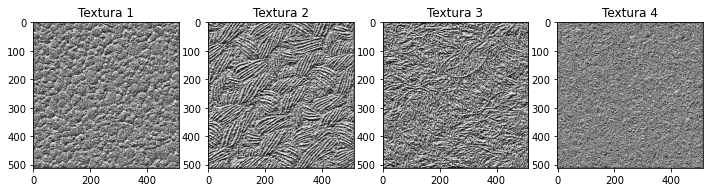

In [38]:
 img_vec = []
 for i in range(4):
    img_name = 'textura' + str(i + 1) + '.png'
    img = io.imread('in/' + img_name)

    if img is None:
        sys.exit("Could not read the image.")

    img = rbg_to_gray(img)

    P = 8
    R = 1
    lbp = local_binary_pattern(img, P, R)

    img_vec.append(lbp)

plot_lbp(img_vec)

In [60]:
plot_histogram(img_vec)

C:\Users\FelipeMatoba\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

(512, 512)
